In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('medical_examination.csv')

In [3]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62,110,80,1,1,0,0,1,0
1,1,20228,1,156,85,140,90,3,1,0,0,1,1
2,2,18857,1,165,64,130,70,1,2,0,0,0,1
3,3,17623,2,169,82,150,100,2,1,1,1,0,1
4,4,17474,1,156,56,100,60,1,1,0,0,1,0
5,5,18000,2,172,90,160,100,3,2,1,1,0,1
6,6,19000,1,160,70,120,80,2,3,0,0,1,0
7,7,20000,2,158,60,130,85,1,1,0,0,1,0
8,8,17000,1,170,95,170,110,2,2,1,1,0,1
9,9,21000,2,175,80,145,95,3,1,0,0,1,1


In [4]:
bmi = df['weight'] / ((df['height'] / 100) ** 2)
df['overweight'] = (bmi > 25).astype(int)

In [5]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64,130,70,1,2,0,0,0,1,0
3,3,17623,2,169,82,150,100,2,1,1,1,0,1,1
4,4,17474,1,156,56,100,60,1,1,0,0,1,0,0
5,5,18000,2,172,90,160,100,3,2,1,1,0,1,1
6,6,19000,1,160,70,120,80,2,3,0,0,1,0,1
7,7,20000,2,158,60,130,85,1,1,0,0,1,0,0
8,8,17000,1,170,95,170,110,2,2,1,1,0,1,1
9,9,21000,2,175,80,145,95,3,1,0,0,1,1,1


In [6]:
df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
df['gluc'] = (df['gluc'] > 1).astype(int)

In [7]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64,130,70,0,1,0,0,0,1,0
3,3,17623,2,169,82,150,100,1,0,1,1,0,1,1
4,4,17474,1,156,56,100,60,0,0,0,0,1,0,0
5,5,18000,2,172,90,160,100,1,1,1,1,0,1,1
6,6,19000,1,160,70,120,80,1,1,0,0,1,0,1
7,7,20000,2,158,60,130,85,0,0,0,0,1,0,0
8,8,17000,1,170,95,170,110,1,1,1,1,0,1,1
9,9,21000,2,175,80,145,95,1,0,0,0,1,1,1


In [8]:
def draw_cat_plot():
    df_cat = pd.melt(df,
                     id_vars=["cardio"],
                     value_vars=["cholesterol", "gluc", "smoke", "alco", "active", "overweight"])
    
    df_cat = df_cat.groupby(["cardio", "variable", "value"]).size().reset_index(name="total")

    fig = sns.catplot(x="variable", 
                      y="total", 
                      hue="value", 
                      col="cardio",
                      data=df_cat, 
                      kind="bar").fig
    return fig


def draw_heat_map():
    # Clean the data
    df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) & 
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))
    ]

        # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(12, 8))

    # Draw the heatmap
    sns.heatmap(
        corr,
        mask=mask,
        annot=True,
        fmt=".1f",
        center=0,
        square=True,
        linewidths=.5,
        cbar_kws={"shrink": .5}
    )

    return fig



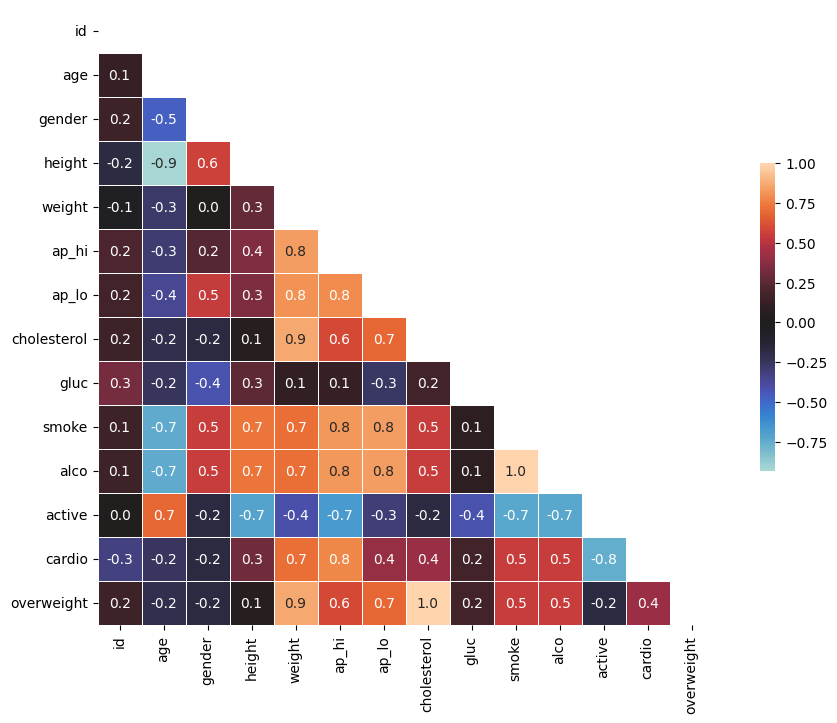

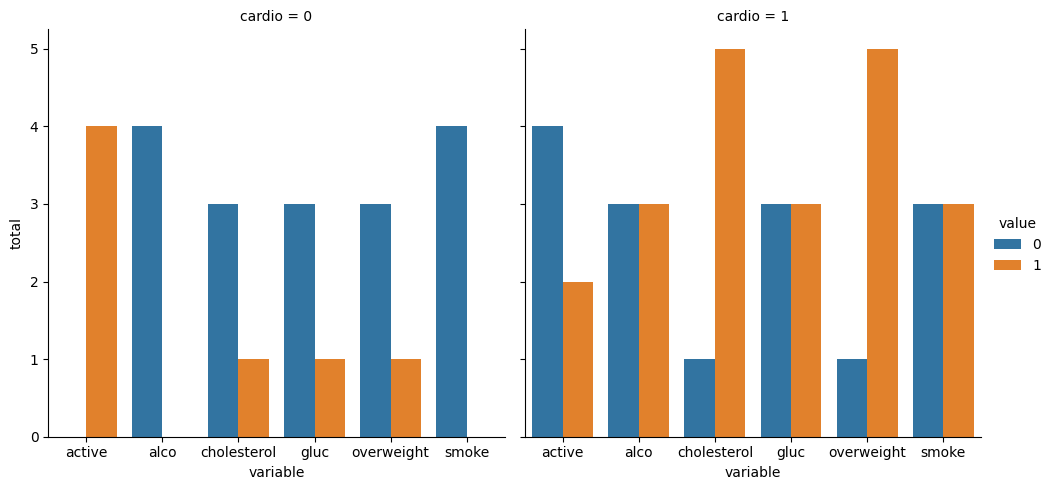

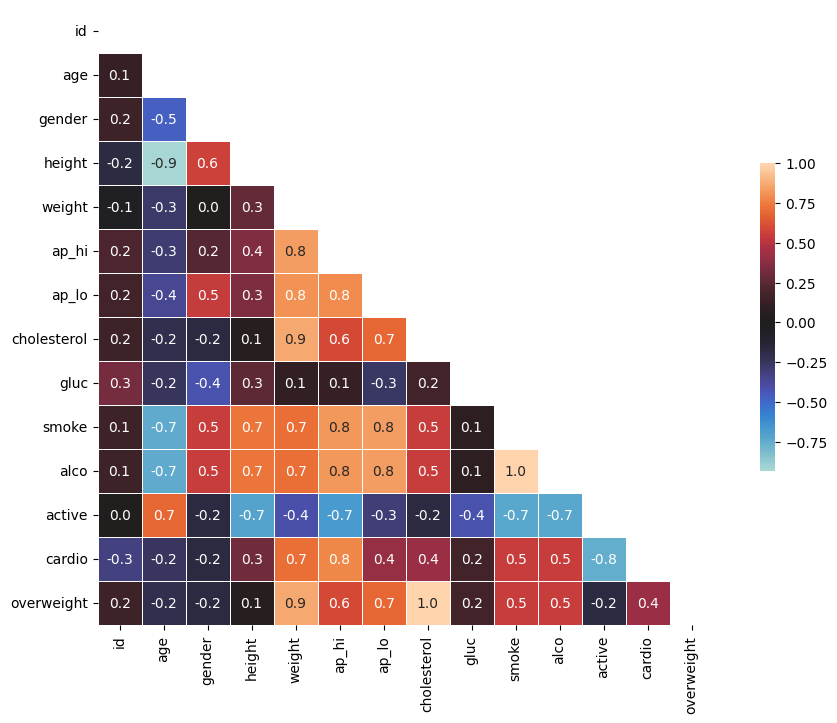

In [9]:
draw_cat_plot()
draw_heat_map()